### Creating a passing map in python

**Pass Map**  is simply a representation for all the passes made by  a player or a team by plotting the starting and the end position of each pass using coordinates

**Pass Map** is an important indicator of the player activness, positioning, availability to his teammates and more

##### Data:
for this use case I used data that I generated from an extended highlights video on yotube for Luka Modric's game against Iiverpool in 2022 the UCL Final.
The dataset has been generated using Video Event Tagger developped by fcpython.com




#### Importing library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch

#### Importing data

In [2]:
passes=pd.read_csv("events.csv")
passes.head(5)

,Team,Player,Event,Mins,Secs,X,Y,end_x,end_y,outcome
0,Home,Modric,Pass,0,25,19,34,29,20,unsuccessful
1,Home,Modric,Pass,0,31,30,84,9,55,successful
2,Home,Modric,Pass,0,33,63,17,70,6,successful
3,Home,Modric,Pass,0,39,30,67,24,83,successful
4,Home,Modric,Pass,0,42,20,83,41,41,successful


##### Adjusting the coordinates to align with the statsbomb pitch dimensions

In [3]:
passes["X"]=passes["X"]*1.2
passes["end_x"]=passes["end_x"]*1.2
passes["Y"]=passes["Y"]*0.8
passes["end_y"]=passes["end_y"]*0.8
passes.head(5)

,Team,Player,Event,Mins,Secs,X,Y,end_x,end_y,outcome
0,Home,Modric,Pass,0,25,22.8,27.2,34.8,16.0,unsuccessful
1,Home,Modric,Pass,0,31,36.0,67.2,10.8,44.0,successful
2,Home,Modric,Pass,0,33,75.6,13.6,84.0,4.8,successful
3,Home,Modric,Pass,0,39,36.0,53.6,28.8,66.4,successful
4,Home,Modric,Pass,0,42,24.0,66.4,49.2,32.8,successful


#### Plotting

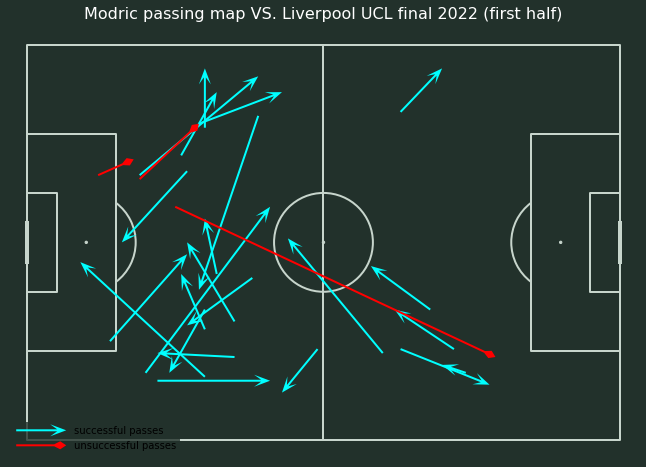

In [4]:
# setting up the canvas
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Plotting the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)
pitch.draw(ax=ax)

# Flipping the y axis to start from 0 to 80
#plt.gca().invert_yaxis()

# Plotting the passes
#Successful passes
pitch.arrows(passes[passes["outcome"]=="successful"].X, passes[passes["outcome"]=="successful"].Y,
             passes[passes["outcome"]=="successful"].end_x, passes[passes["outcome"]=="successful"].end_y, width=2,
             headwidth=6, headlength=8, color='cyan', ax=ax, label='successful passes')
#unuccessful passes
pitch.arrows(passes[passes["outcome"]=="unsuccessful"].X, passes[passes["outcome"]=="unsuccessful"].Y,
             passes[passes["outcome"]=="unsuccessful"].end_x, passes[passes["outcome"]=="unsuccessful"].end_y, width=2,
             headwidth=4, headlength=3, headaxislength=6, color='red', ax=ax, label='unsuccessful passes')
# setup the legend and title
ax.legend(facecolor='#22312b',handlelength=5, edgecolor='None', fontsize=10, loc='lower left')
plt.title("Modric passing map VS. Liverpool UCL final 2022 (first half)",color="white",size=16)
plt.savefig("Passes Map")

#### From the map we can see that Modric mostly played on the first third of the pitch as Liverpool were pressing intensively during the first half, So he was constantly helping his team to escape that pressure instead of playing higher up the pitch where he usually plays. 